In [1]:
import astropy
from astropy.io import fits
from astropy import units as u

import numpy as np
import matplotlib.pyplot as plt

import sherpa
import sherpa.astro.ui as ui
from sherpa.models.basic import Gauss1D, PowLaw1D
from sherpa.models import PowLaw1D
from sherpa.data import Data1D
from sherpa.plot import DataPlot, ModelPlot, FitPlot
from sherpa.stats import LeastSq
from sherpa.optmethods import LevMar, NelderMead
from sherpa.fit import Fit

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


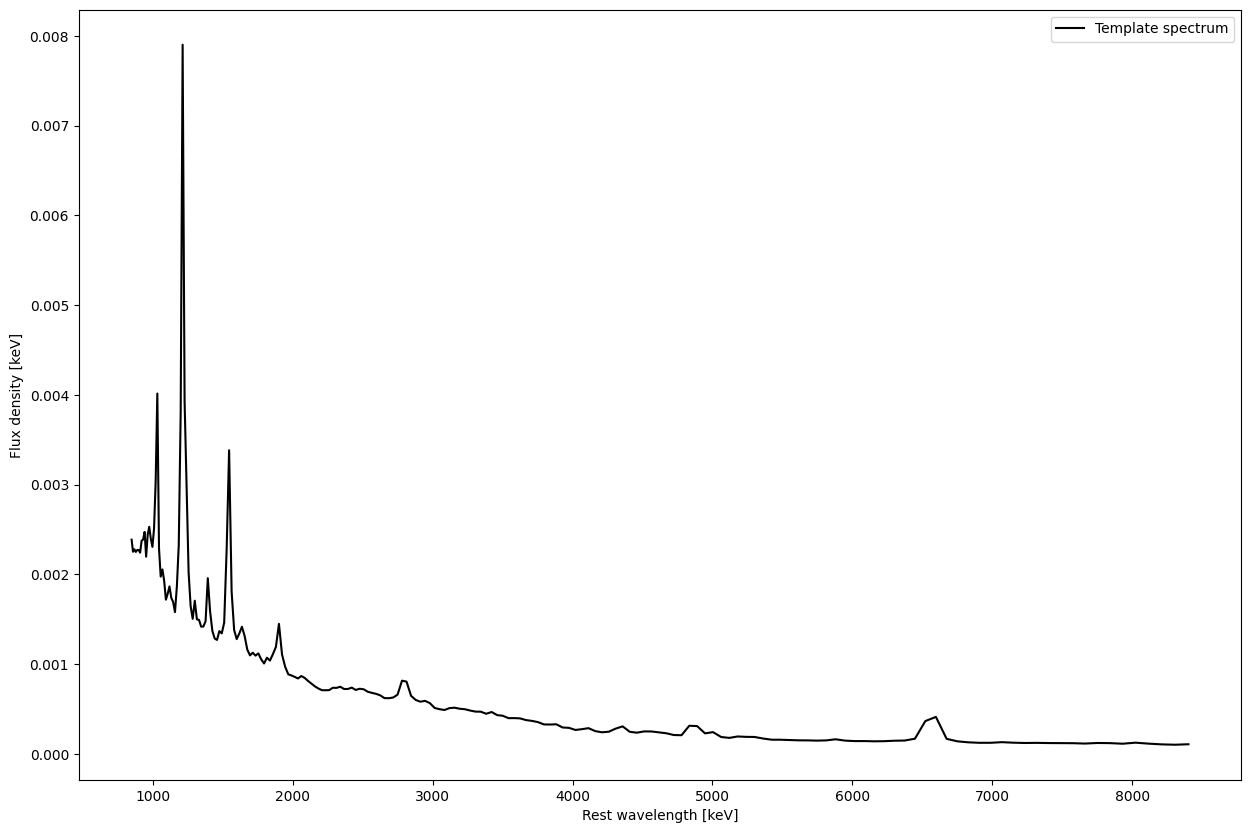

Spectrum Data Object:
name      = Data and Model (Not Best Fit)
x         = Float64[200]
y         = Float64[200]
staterror = None
syserror  = None


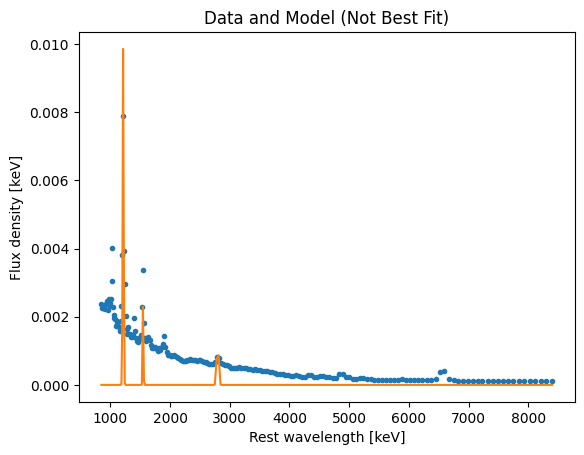

Model Object: 
data      = Data and Model (Not Best Fit)
model     = (((gauss1d + gauss1d) + gauss1d) + powlaw1d)
stat      = LeastSq
method    = LevMar
estmethod = Covariance
Model Result:  True


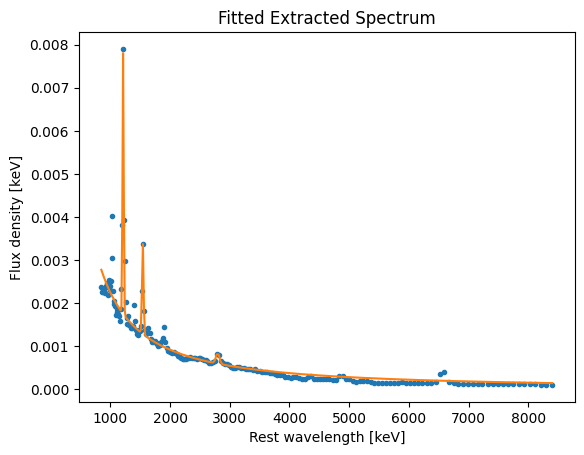

Parameters (after best fit):
('gauss1d.fwhm', 'gauss1d.pos', 'gauss1d.ampl', 'gauss1d.fwhm', 'gauss1d.pos', 'gauss1d.ampl', 'gauss1d.fwhm', 'gauss1d.pos', 'gauss1d.ampl', 'powlaw1d.gamma', 'powlaw1d.ampl')
(23.574389002634156, 1214.7408167813498, 0.006059733664551817, 67.54012784093855, 2798.8270298217144, 0.0002504014281387788, 29.284793797659812, 1544.0706032434446, 0.0021285590172658688, 1.29189831812065, 16.891874644810404)


In [11]:

#create the AGN model - consists of powerlaw and gaussian lines
#note that the AGN model is defined in units of wavelengths (angstroms)
#later we will define the AGN model in keV to match our ARF and RMF files

#create the power law continuum model
#set initial photon index of power law to 2
powerlaw = PowLaw1D()
powerlaw.gamma = 2.0

#create the Gaussian line models
#lyman alpha emission line taken at rest wavelength
lyman_alpha = Gauss1D()
lyman_alpha.pos = 1215.67       #Lyman alpha position
lyman_alpha.ampl = 100/10000    #Lyman alpha amplitude
lyman_alpha.fwhm = 19.46        #Lyman alpha FWHM

#Mg[II] emission line taken at rest wavelength
mg_ii = Gauss1D()
mg_ii.pos = 2798.75             #Magnesium II position
mg_ii.ampl = 14.725/10000       #Magnesium II amplitude
mg_ii.fwhm = 34.95              #Magnesium II FWHM

#C[IV] emission line taken at rest wavelength
c_iv = Gauss1D()
c_iv.pos = 1549.06             #Carbon IV position
c_iv.ampl = 25.291/10000       #Carbon IV amplitude
c_iv.fwhm = 14.33              #Carbon IV FWHM

#define the model 
#final model contains all emission lines present in AGN source 
#emission lines are added to the powerlaw
AGN_model = lyman_alpha + mg_ii + c_iv + powerlaw

#load template spectrum
template_spectrum_path = "assets/shang_etal_2011_figure6_flambdaunits.dat"

#first column is the wavelength
#second column is the flux
wave = np.loadtxt(template_spectrum_path, skiprows=1, usecols=0)  ## wavelength [Angstrom] or [A]
flambda = np.loadtxt(template_spectrum_path, skiprows=1, usecols=1)  ## flux density [erg/s/cm^2/A]

#plot the data - template spectrum 
fig1 = plt.figure(figsize=(15,10))
plt.xlabel('Rest wavelength [keV]')
plt.ylabel('Flux density [keV]')
plt.plot(wave, flambda, color='k', ls='-', label='Template spectrum')
plt.legend(loc='best')
plt.show()

#create a data object that pertains to the above template spectrum
data = Data1D('Data and Model (Not Best Fit)', wave, flambda)
print("Spectrum Data Object:")
print(data)

#create data plot
dplot = DataPlot()
dplot.prepare(data)

#create model plot
mplot = ModelPlot()
mplot.prepare(data, AGN_model)

#plot model and data on same graph
dplot.plot()
mplot.overplot()
plt.xlabel('Rest wavelength [keV]')
plt.ylabel('Flux density [keV]')
plt.title('Data and Model (Not Best Fit)')
plt.show()

#least-square statistic is used
stat = LeastSq()
#optimiser is the part that determines how to minimise the statistic value
#Levenberg-Marquardt (LevMar) is used
opt = LevMar()

#fit the data using the chosen statistic and optimizer method
#best fit of the data set is determined when the least square stat is minimized 
modelfit = Fit(data, AGN_model, stat=stat, method=opt)
print("Model Object: ")
print(modelfit)
modelres = modelfit.fit()
print("Model Result: ", modelres.succeeded)

#plot the fit 
fplot = FitPlot()
mplot.prepare(data, AGN_model)
fplot.prepare(dplot, mplot)
fplot.plot()
plt.xlabel('Rest wavelength [keV]')
plt.ylabel('Flux density [keV]')
plt.title("Fitted Extracted Spectrum")
plt.show()

#print the fitted parameters and values
print("Parameters (after best fit):")
print(modelres.parnames)
print(modelres.parvals)

In [3]:
m_amp= [] #list of the Mg emission line amplitudes
c_amp = [] #list of the Calcium emission line amplitudes
l_amp = [] #list of the Lyman-alpha emission line amplitudes

m_fwhm = [] #list of the Mg emission line full width max
c_fwhm = [] #list of the Calcium emission line full width max
l_fwhm = [] #list of the Lyman-alpha emission line full width max

m_pos = [] #list of the Mg emission line positions
c_pos = [] #list of the Calcium emission line positions
l_pos = [] #list of the Lyman-alpha emission line positions

p_gamma = [] #list of powerlaw photon index for each model

In [4]:
n_spectra = int(input("How many spectra do you want to generate: "))
for x in range(n_spectra):
    print(f"For spectra {x}: ") 
    amp = float(input("Enter the amplitude of the Mg II emission line: ")) #Mg amp
    m_amp.append(amp)
    
    full_width = float(input("Enter the FWHM of the Mg II emission line: ")) #Mg fwhm
    m_fwhm.append(full_width)
    
    pos = float(input("Enter the position of the Mg II emission line: ")) #Mg pos
    m_pos.append(pos)
    
    #Calcium IV
    amp = float(input("Enter the amplitude of the C IV emission line: ")) #amp
    c_amp.append(amp)
    
    full_width = float(input("Enter the FWHM of the C IV emission line: ")) #fwhm
    c_fwhm.append(full_width)
    
    pos = float(input("Enter the position of the C IV emission line: ")) #pos
    c_pos.append(pos)
    
    #Lyman-alpha
    amp = float(input("Enter the amplitude of the Lyman-alpha emission line: ")) #amp
    l_amp.append(amp)
    
    full_width = float(input("Enter the FWHM of the Lyman-alpha emission line: ")) #fwhm
    l_fwhm.append(full_width)
    
    pos = float(input("Enter the position of the Lyman-alpha emission line: ")) #pos
    l_pos.append(pos)
    
    powlaw = float(input("Enter the powerlaw photon index: "))
    p_gamma.append(powlaw)
        

How many spectra do you want to generate:  1


For spectra 0: 


Enter the amplitude of the Mg II emission line:  15
Enter the FWHM of the Mg II emission line:  28
Enter the position of the Mg II emission line:  2700
Enter the amplitude of the C IV emission line:  30
Enter the FWHM of the C IV emission line:  19
Enter the position of the C IV emission line:  1800
Enter the amplitude of the Lyman-alpha emission line:  100
Enter the FWHM of the Lyman-alpha emission line:  17
Enter the position of the Lyman-alpha emission line:  1200
Enter the powerlaw photon index:  1.5


In [7]:
for y in range(n_spectra):
    print("Model: " + str(m_amp[y]))
    mg_ii.ampl = m_amp[y] / 10000 
    mg_ii.fwhm = m_fwhm[y]
    mg_ii.pos = m_pos[y]
    print(m_amp)
    
    c_iv.ampl = c_amp[y] / 10000
    c_iv.fwhm = c_fwhm[y] 
    c_iv.pos = c_pos [y]
    
    lyman_alpha.ampl = l_amp[y] / 10000
    lyman_alpha.fwhm = l_fwhm[y] 
    lyman_alpha.pos = l_pos[y]
    
    
    ui.set_model(AGN_model)

    #create model plot
    mplot = ModelPlot()
    mplot.prepare(data, AGN_model)

    mplot.overplot()
    plt.xlabel('Rest wavelength [keV]')
    plt.ylabel('Flux density [keV]')
    plt.title('Fake Spectra')
    plt.show()

Model: 15.0
[15.0]


NameError: name 'data' is not defined

Model: 0
Model Result:  True


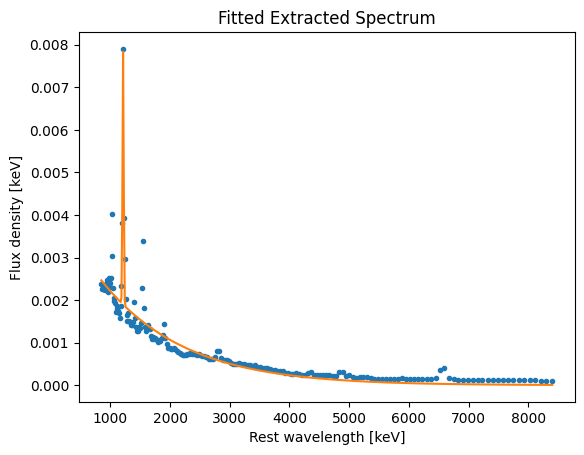

In [55]:
for y in range(n_spectra):
    print("Model: " + str(y))

    ui.set_model(AGN_model)


    #fitting
    modelfit = Fit(data, AGN_model, stat=stat, method=opt)    
    modelres = modelfit.fit()
    print("Model Result: ", modelres.succeeded)

    #plot the fit 
    fplot = FitPlot()
    mplot.prepare(data, AGN_model)
    fplot.prepare(dplot, mplot)
    fplot.plot()
    plt.xlabel('Rest wavelength [keV]')
    plt.ylabel('Flux density [keV]')
    plt.title("Fitted Extracted Spectrum")
    plt.show()